In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames[:1]:
#         print(os.path.join(dirname, filename))

import os
cwd = os.getcwd()
cwd
# Any results you write to the current directory are saved as output.

'/home/icog/yonathan/chest-xray-imaging'

# Part - 1: Prepare the data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# add image filepath to the dataframe
all_xray_df = pd.read_csv('input/chest_xrays/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in glob(os.path.join('input', 'chest_xrays', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
67042,00016568_043.png,Effusion|Pneumothorax,43,16568,39,F,PA,2992,2991,0.143,0.143,NaN,input/chest_xrays/images_008/images/00016568_0...
8585,00002272_002.png,No Finding,2,2272,53,M,AP,3056,2544,0.139,0.139,NaN,input/chest_xrays/images_002/images/00002272_0...
110124,00029972_000.png,No Finding,0,29972,44,M,PA,3056,2544,0.139,0.139,NaN,input/chest_xrays/images_012/images/00029972_0...


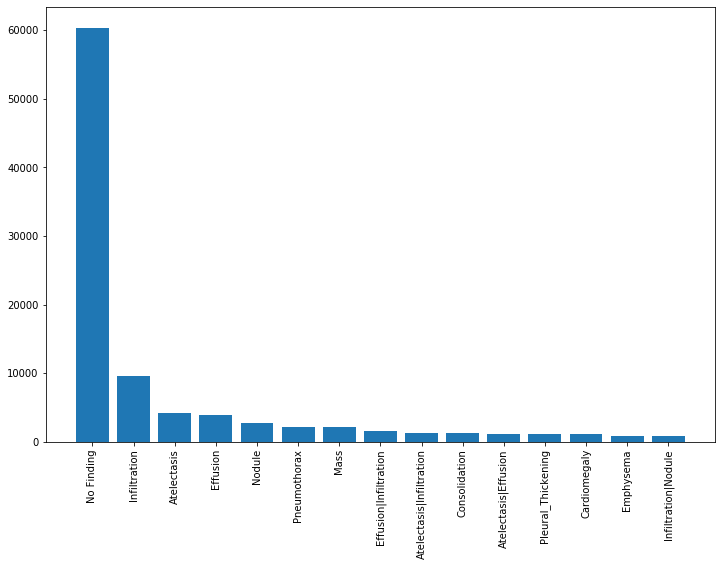

In [4]:
# visualizing label counts
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [5]:
# change the labels to one hot encoded values
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
# all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])
all_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
6407,00001724_007.png,,7,1724,34,F,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,0,0,0
48295,00012241_003.png,,3,12241,25,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
23004,00006073_000.png,,0,6073,23,F,PA,2048,2500,0.171,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# use only some of the columns
save_columns = ['Image Index', 'Finding Labels', 'path', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
                'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
                'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
updated_xray_df = all_xray_df.loc[:, save_columns]
updated_xray_df.sample(3)

,Image Index,Finding Labels,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
11260,00002945_004.png,,input/chest_xrays/images_002/images/00002945_0...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,00000513_000.png,Atelectasis|Infiltration,input/chest_xrays/images_001/images/00000513_0...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
65607,00016191_019.png,,input/chest_xrays/images_008/images/00016191_0...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# # generate train_val dataframe and save it to csv
# train_val_image_indexes = []
# with open('../input/data/train_val_list.txt') as file:
#     for line in file:
#         line = line.strip()
#         train_val_image_indexes.append(line)
        
# train_val_list_df = updated_xray_df[updated_xray_df['Image Index'].map(lambda x: True if x in train_val_image_indexes else False)]
# # train_val_list_df = train_val_list_df.drop(columns=['Finding Labels', 'path'])
# train_val_list_df.to_csv(os.path.join('../working', 'train_val_list.csv'), index=False)

In [8]:
# # generate train_val dataframe and save it to csv
# test_image_indexes = []
# with open('../input/data/test_list.txt') as file:
#     for line in file:
#         line = line.strip()
#         test_image_indexes.append(line)
        
# test_list_df = updated_xray_df[updated_xray_df['Image Index'].map(lambda x: True if x in test_image_indexes else False)]
# # test_list_df = test_list_df.drop(columns=['Finding Labels', 'path'])
# test_list_df.to_csv(os.path.join('../working', 'test_list.csv'), index=False)

In [9]:
# print('train_val:', train_val_list_df.shape[0], '\ttest:', test_list_df.shape[0])

In [10]:
# move training image to image/train_val directory
# import shutil
# dst_path = '../input/data/images/train_val'
# for image_index in train_val_list_df['Image Index']:
#     try:
#         shutil.move(image_index, dest_path)
#     except:
#         print("image file conflict occured.")

In [11]:
# split the dataset into 92% training, 5% validation and 3% test
image_indexes = np.array(updated_xray_df['Image Index'])

train_len = int(len(image_indexes) * 0.92)
val_len = int(len(image_indexes) * 0.05)
test_len = int(len(image_indexes) * 0.03)

np.random.shuffle(image_indexes)
train_indexes = image_indexes[:train_len]
val_indexes = image_indexes[train_len: train_len + val_len]
test_indexes = image_indexes[train_len + val_len: ]

train_path = "input/chest_xrays/train.csv"
val_path = "input/chest_xrays/val.csv"
test_path = "input/chest_xrays/test.csv"

if not os.path.exists(train_path):
    train_df = updated_xray_df[updated_xray_df['Image Index'].map(lambda x: True if x in train_indexes else False)]
    train_df.to_csv(train_path, index=False)
if not os.path.exists(val_path):
    val_df = updated_xray_df[updated_xray_df['Image Index'].map(lambda x: True if x in val_indexes else False)]
    val_df.to_csv(val_path, index=False)
if not os.path.exists(test_path):
    test_df = updated_xray_df[updated_xray_df['Image Index'].map(lambda x: True if x in test_indexes else False)]
    test_df.to_csv(test_path, index=False)

# Part - 2: Build the model

In [12]:
import tensorflow

In [13]:
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.optimizers import Adam

Using TensorFlow backend.


In [14]:
# fine-tune densenet model
def create_model(input_shape=(224, 224, 3), num_classes=14, show_summary=False):
    img_input = Input(input_shape)
    densenet_model = DenseNet121(include_top=False,
                                 weights="imagenet",
                                 input_tensor=img_input,
                                 input_shape=input_shape,
                                 pooling="avg"
                                )
    x = densenet_model.output
    predictions = Dense(num_classes, activation="softmax", name="predictions")(x)
    model = Model(inputs=img_input, outputs=predictions)
    if show_summary:
        model.summary()

    return model

# Part - 3: Train the model

In [15]:
# check output_dir, create it if not exists
output_dir = "./output"
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)
    os.makedirs(os.path.join(output_dir, "models"))
    os.makedirs(os.path.join(output_dir, "weights"))
    os.makedirs(os.path.join(output_dir, "logs"))

In [16]:
# training configurations
train_path = "input/chest_xrays/train.csv"
train_path = "input/chest_xrays/val.csv"
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis',
               'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

target_size=(224,224,3)
batch_size=32
epochs=100
initial_learning_rate = 0.001

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)

train_steps = np.ceil(len(train_df)/batch_size)
validation_steps = np.ceil(len(val_df)/batch_size)

output_dir = "./output"
model_path = os.path.join(output_dir, "models/chest_xray_imaging_model.h5")
weights_path = os.path.join(output_dir, "weights/chest_xray_imaging_weights.h5")
log_dir = os.path.join(output_dir, "logs")

In [17]:
from PIL import Image
from keras.utils import Sequence

# define custom datagenerator
class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, dataset_csv_file, class_names, batch_size=32, target_size=(224,224,3), shuffle=True):
        'Initialization'
        self.dataset_df = pd.read_csv(dataset_csv_file)
        self.indexes = np.array(self.dataset_df['Image Index'])
        self.image_paths = self.dataset_df['path']
        self.labels = self.dataset_df[class_names]
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        batch_image_paths = self.image_paths[index * self.batch_size: (index + 1) * self.batch_size]
        batch_x = np.asarray([self.load_image(image_path) for image_path in batch_image_paths])
        batch_x = self.normalize_batch_images(batch_x)
        batch_y = self.labels[index * self.batch_size: (index + 1) * self.batch_size]
        return batch_x, batch_y


    def load_image(self, image_path):
        image_path = os.path.join(os.getcwd(), image_path)
        image = Image.open(image_path)
        image_array = np.asarray(image.convert("RGB"))
        image_array = image_array / 255.
        image_array = np.resize(image_array, self.target_size)
        return image_array

    def normalize_batch_images(self, batch_x):
        imagenet_mean = np.array([0.485, 0.456, 0.406])
        imagenet_std = np.array([0.229, 0.224, 0.225])
        batch_x = (batch_x - imagenet_mean) / imagenet_std
        return batch_x

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [18]:
# create data generator
train_datagen = DataGenerator(dataset_csv_file = train_path,
                              class_names = class_names,
                              batch_size=batch_size,
                              target_size=target_size,
                              shuffle=True)

validation_datagen = DataGenerator(dataset_csv_file = val_path,
                                  class_names = class_names,
                                  batch_size=batch_size,
                                  target_size=target_size,
                                  shuffle=True)

In [25]:
# callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, EarlyStopping

checkpoint = ModelCheckpoint(model_path, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min', 
                             save_weights_only = False)

reduceLR = ReduceLROnPlateau(monitor='val_loss', 
                             factor=0.1, 
                             patience=1,
                             verbose=1, 
                             mode="min", 
                             min_lr=1e-8)

tensorboard = TensorBoard(log_dir=log_dir)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [checkpoint, reduceLR, tensorboard, earlystop]


In [26]:
# train the model
from keras.models import load_model
from keras.utils import multi_gpu_model

# resum training if exists
if os.path.exists(model_path):
    # load model checkpoint
    print(".... loading trained model ....")
    model = load_model(model_path) # load the architecture, weigths, triaining configuration, and training status
else:
    print("create new model")
    model = create_model()
    model.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy",  metrics=["accuracy"])

# check multiple gpu availability
gpus = len(os.getenv("CUDA_VISIBLE_DEVICES", "1").split(","))
if gpus > 1:
    print(f"** multi_gpu_model is used! gpus={gpus} **")
    model = multi_gpu_model(model, gpus)
else:
    print("there is no gpu in this device")
model.fit_generator(train_datagen, 
                    steps_per_epoch=train_steps,
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=callbacks, 
                    validation_data=validation_datagen, 
                    validation_steps=validation_steps, 
#                     validation_freq=1, 
                    class_weight=None, 
                    max_queue_size=10, 
                    workers=1, 
                    use_multiprocessing=False, 
                    shuffle=True, 
                    initial_epoch=0)


.... loading trained model ....
there is no gpu in this device
Epoch 1/100
176/176 [==============================] - 375s 2s/step - loss: 0.1839 - acc: 0.9487 - val_loss: 0.1847 - val_acc: 0.9487

Epoch 00001: val_loss improved from inf to 0.18471, saving model to ./output/models/chest_xray_imaging_model.h5
Epoch 2/100
176/176 [==============================] - 340s 2s/step - loss: 0.1838 - acc: 0.9487 - val_loss: 0.1847 - val_acc: 0.9487

Epoch 00002: val_loss did not improve from 0.18471

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 3/100
176/176 [==============================] - 410s 2s/step - loss: 0.1837 - acc: 0.9487 - val_loss: 0.1847 - val_acc: 0.9487

Epoch 00003: val_loss did not improve from 0.18471

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 4/100
176/176 [==============================] - 405s 2s/step - loss: 0.1836 - acc: 0.9487 - val_loss: 0.1848 - val_acc: 0.9487

Epoch 00004: val_lo

# Part - 4: Analyze the model’s results 

In [ ]:
# testing configurations
test_path = "../working/test.csv"
target_size = (224, 224, 3)

In [ ]:
# auroc test


In [ ]:
# predictionon sample image


In [ ]:
# heatmap
